# Constrained-Mechanical-Systems-Forward-Dynamic-Simulation-of-Chain-links
Multibody dynamics modeling and numerical methods

## Deca Pendulum

In [1]:
%matplotlib inline
import time
import numpy as np
from scipy.integrate import solve_ivp
from IPython.display import display, Markdown
import matplotlib as mpl
from Models.models import *
from utils.SolutionDemo import *
sp.init_printing()
mpl.rcParams['figure.dpi'] = 50
repo_dir = os.path.dirname(os.getcwd())

### 1 Explicit calculation of the Lagrange multiplier

In [10]:
m=np.tile([1], 10)
l=np.tile([1], 10)
Ten_Model = ExplictModel(m=m, l=l,close_chain=False)
y0, v0 = Ten_Model.initial_condition(np.tile([None, None, 0], 10), np.zeros(3*len(m)))
y = np.append(y0, v0)
g = np.tile([0, -9.81, 0], len(m))
f = np.tile([0, 0, 0], len(m))

### System constrains:

### System governing equations

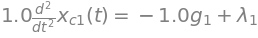

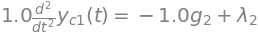

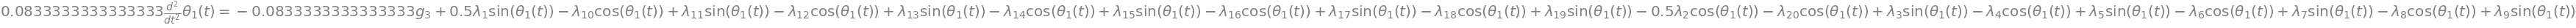

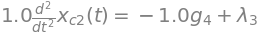

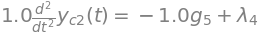

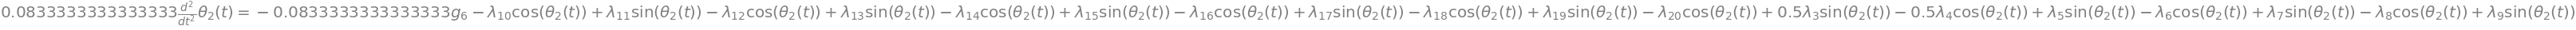

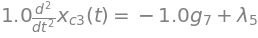

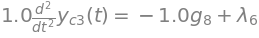

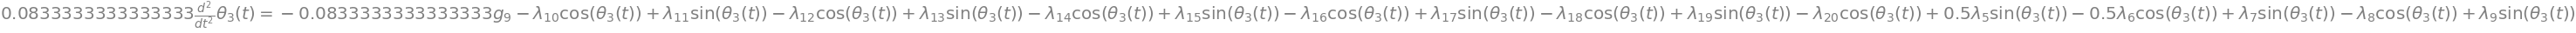

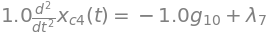

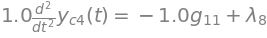

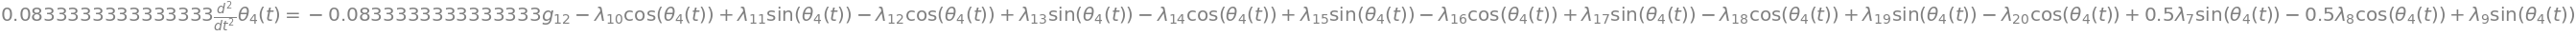

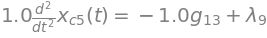

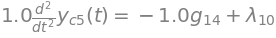

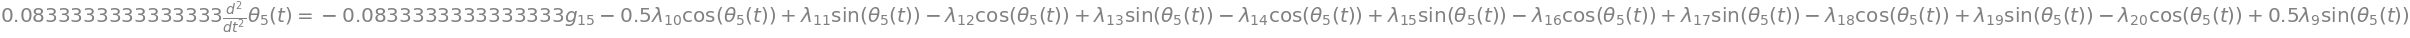

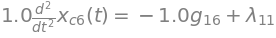

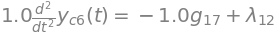

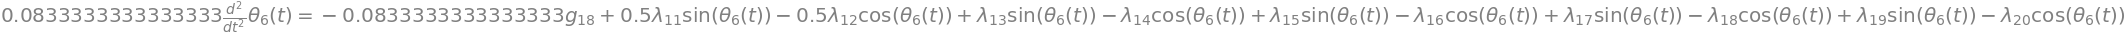

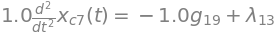

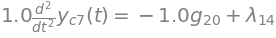

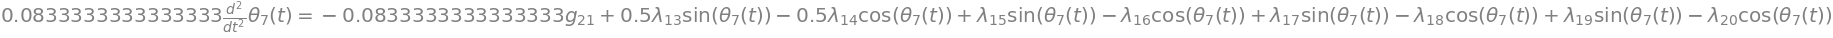

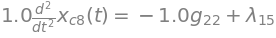

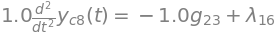

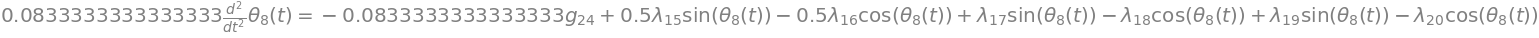

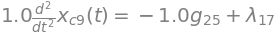

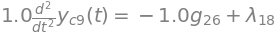

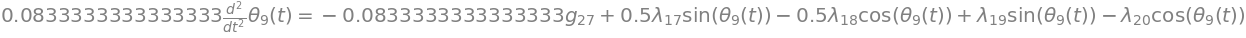

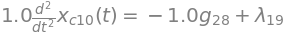

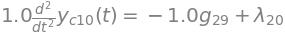

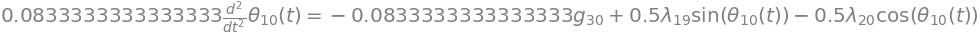

In [8]:
print_constrains(Ten_Model)
print_govs(Ten_Model, f)

In [12]:
ode = 'DOP853'
sol = solve_ivp(Ten_Model.sim, [0, 10], y, method=ode, args=(f, g), t_eval=np.linspace(0, 10, 200))
TenPend = SolutionDemo(sol, m, l, rot=None)
multipliers = get_multipliers(Ten_Model, f, g, sol, show=False)
print(TenPend.links.shape)

(10, 200, 2, 2)


In [13]:
gif = TenPend.animate(title=ode, interval=50, axis='off', save_as=repo_dir+'/imgs/DecaPendulum.gif')

In [14]:
TenPend.more_anim(multipliers, title='Deca Pendulum', interval=50, save_as=repo_dir+'/imgs/DecaPendulum.mp4')